In [4]:
pip install pyswarms

  Using cached pyswarms-1.3.0-py2.py3-none-any.whl (104 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import random 
from pathlib import Path
import pyswarms as ps

In [5]:
fuel = data['Fuel']
vehicle = data['Vehicle']

cost_lookup = data['Cost ($)'].values


In [19]:
demand = data['Demand (km)'].values*-1

In [30]:
# def f_per_particle(m,Min_cost):
#     j = 0
#     if np.count_nonzero(m) != NUM_vehicles:
#         j += 5e4 
#     # j += utility[np.where(m==1)].sum()
#     cost_budget = cost_lookup[np.where(m==1)].sum()
#     if cost_budget > Min_cost:
#         j += cost_budget
#     return j

def f_per_particle(m, Min_cost):
    penalty = 0
    if np.count_nonzero(m) != NUM_vehicles:
        penalty += 1e3  # Reduced penalty
    cost_budget = cost_lookup[np.where(m == 1)].sum()
    if cost_budget > Min_cost:
        penalty += cost_budget - Min_cost  # Penalize exceeding the budget
    return penalty


In [31]:
def f(x,min_cost = Min_cost):
    n_particles =  x.shape[0]
    j = [f_per_particle(x[i],Min_cost) for i in range(n_particles)]  
    return np.array(j)

In [32]:
def run_model(options):
    optimizer = ps.discrete.BinaryPSO(n_particles=SWARM_SIZE, dimensions=NUM_vehicles, options=options)
    
    cost, pos = optimizer.optimize(f, iters=NUM_ITER)
    print(f'No. of vehicles selected: {pos.sum()}; '
          f'cost per year : {cost_lookup[np.where(pos==1)].sum()}; ')
    print( '\nMode1 Run times: ')
    return cost, pos, optimizer.cost_history

In [33]:
def plot_history(history):
    plt.style.use( 'ggplot')
    plt.rcParams['ytick.right'] = True
    plt.rcParams['ytick.labelright'] = True
    plt.rcParams['ytick.left'] = False
    plt.rcParams['ytick.labelleft'] = False
    plt.rcParams['font.family'] = 'Arial'
    
    plt.ylim([min(history) - 1000, max(history) + 500])
    plt.title('Cost History')
    plt.plot(history)

In [37]:
def plot_history(history):
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 5))
    plt.plot(history, label='Cost')
    plt.title('Cost History')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.legend()
    plt.show()


In [34]:
checkpoint_state = np.random.get_state()


In [39]:
%%time
np.random.set_state(checkpoint_state)
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': SWARM_SIZE, 'p': 2}
# options = {'c1': 1.5, 'c2': 1.5, 'w': 0.5, 'k': 10, 'p': 2}
cost, pos, history = run_model(options)

2025-01-26 15:45:31,662 - pyswarms.discrete.binary - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary:   0%|          |0/1000, best_cost=1e+3

pyswarms.discrete.binary: 100%|██████████|1000/1000, best_cost=1e+3
2025-01-26 15:45:35,157 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 1000.0, best pos: [0 0 0 0 1 0 0 1 1 1 0 0]


No. of vehicles selected: 4; cost per year : 470000; 

Mode1 Run times: 
CPU times: total: 1.66 s
Wall time: 3.51 s


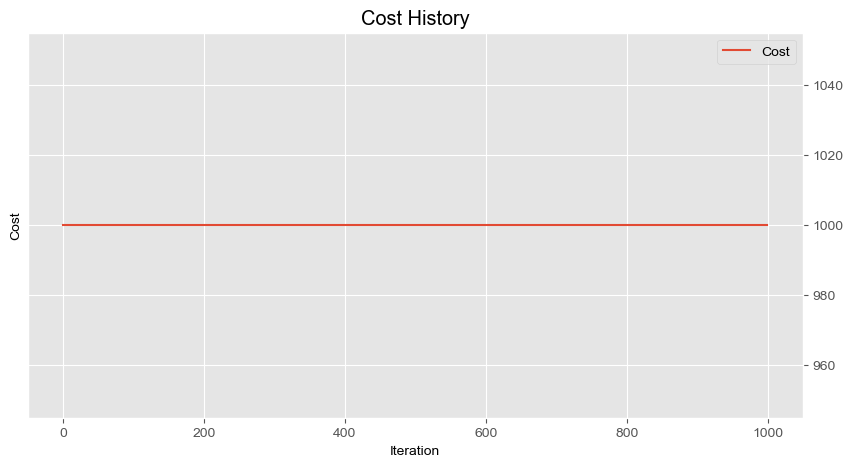

In [40]:
plot_history(history)

2025-01-26 15:49:15,695 - pyswarms.discrete.binary - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|1000/1000, best_cost=2.7e+5
2025-01-26 15:49:18,135 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 270000.0, best pos: [0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


No. of vehicles selected: 3
Total cost: 270000
Selected vehicles (indices): [1 2 3]


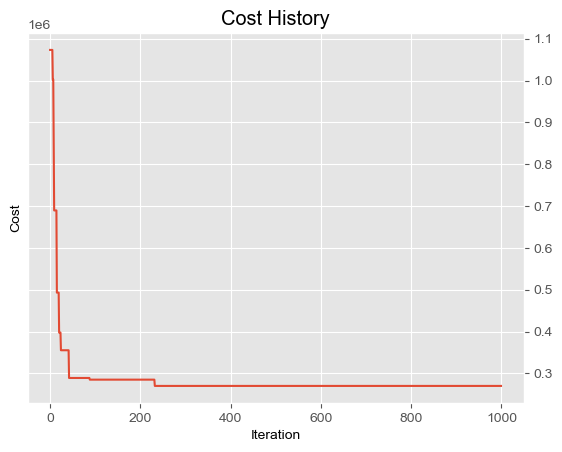

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from pathlib import Path
import pyswarms as ps

# Set random seed for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Parameters
NUM_vehicles = 3  # Number of vehicles to select
SWARM_SIZE = 30   # Number of particles in the swarm
NUM_ITER = 1000   # Number of iterations for optimization

# Load dataset
data = pd.read_csv("data/fleet_data_2023.csv")

# Extract relevant data from the dataset
cost_lookup = data['Cost ($)'].values  # Vehicle costs
demand = data['Demand (km)'].values * -1  # Demand (converted to negative for minimization)

# Ensure data integrity
assert len(cost_lookup) == len(demand), "Mismatch between cost and demand data."

# Fitness function for a single particle
def f_per_particle(m, penalty_factor=1e5):
    # Ensure only NUM_vehicles are selected
    penalty = penalty_factor * abs(np.count_nonzero(m) - NUM_vehicles)

    # Calculate total cost of selected vehicles
    total_cost = cost_lookup[np.where(m == 1)].sum()

    # Combine cost and penalty
    return total_cost + penalty

# Fitness function for the swarm
def f(x):
    n_particles = x.shape[0]
    return np.array([f_per_particle(x[i]) for i in range(n_particles)])

# Run optimization model
def run_model(options):
    optimizer = ps.discrete.BinaryPSO(n_particles=SWARM_SIZE, dimensions=len(cost_lookup), options=options)
    cost, pos = optimizer.optimize(f, iters=NUM_ITER)

    # Print results
    print(f'No. of vehicles selected: {np.count_nonzero(pos)}')
    print(f'Total cost: {cost_lookup[np.where(pos == 1)].sum()}')
    print(f'Selected vehicles (indices): {np.where(pos == 1)[0]}')
    return cost, pos, optimizer.cost_history

# Plot cost history
def plot_history(history):
    plt.style.use('ggplot')
    plt.plot(history)
    plt.title('Cost History')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.show()

# Run optimization
checkpoint_state = np.random.get_state()
np.random.set_state(checkpoint_state)
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': SWARM_SIZE, 'p': 2}

cost, pos, history = run_model(options)

# Plot cost history
plot_history(history)


2025-01-26 15:52:40,772 - pyswarms.discrete.binary - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|1000/1000, best_cost=1.17e+6
2025-01-26 15:52:43,117 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 1170000.0, best pos: [0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


No. of vehicles selected: 4
Total cost: 370000
Selected vehicles (indices): [1 2 3 4]


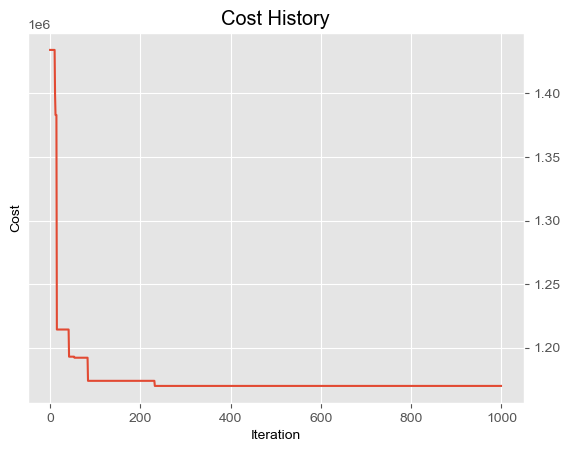

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from pathlib import Path
import pyswarms as ps

# Set random seed for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Parameters
NUM_vehicles = data['ID'].nunique() # Number of vehicles to select
SWARM_SIZE = 30   # Number of particles in the swarm
NUM_ITER = 1000   # Number of iterations for optimization

# Load dataset
data = pd.read_csv("data/fleet_data_2023.csv")

# Extract relevant data from the dataset
cost_lookup = data['Cost ($)'].values  # Vehicle costs
demand = data['Demand (km)'].values * -1  # Demand (converted to negative for minimization)

# Ensure data integrity
assert len(cost_lookup) == len(demand), "Mismatch between cost and demand data."

# Fitness function for a single particle
def f_per_particle(m, penalty_factor=1e5):
    # Ensure only NUM_vehicles are selected
    penalty = penalty_factor * abs(np.count_nonzero(m) - NUM_vehicles)

    # Calculate total cost of selected vehicles
    total_cost = cost_lookup[np.where(m == 1)].sum()

    # Combine cost and penalty
    return total_cost + penalty

# Fitness function for the swarm
def f(x):
    n_particles = x.shape[0]
    return np.array([f_per_particle(x[i]) for i in range(n_particles)])

# Run optimization model
def run_model(options):
    optimizer = ps.discrete.BinaryPSO(n_particles=SWARM_SIZE, dimensions=len(cost_lookup), options=options)
    cost, pos = optimizer.optimize(f, iters=NUM_ITER)

    # Print results
    print(f'No. of vehicles selected: {np.count_nonzero(pos)}')
    print(f'Total cost: {cost_lookup[np.where(pos == 1)].sum()}')
    print(f'Selected vehicles (indices): {np.where(pos == 1)[0]}')
    return cost, pos, optimizer.cost_history

# Plot cost history
def plot_history(history):
    plt.style.use('ggplot')
    plt.plot(history)
    plt.title('Cost History')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.show()

# Run optimization
checkpoint_state = np.random.get_state()
np.random.set_state(checkpoint_state)
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': SWARM_SIZE, 'p': 2}

cost, pos, history = run_model(options)

# Plot cost history
plot_history(history)


In [43]:
# Function to save selected vehicles to a CSV file
def save_selected_vehicles_to_csv(cost_lookup, pos, filename="selected_vehicles.csv"):
    selected_indices = np.where(pos == 1)[0]
    selected_vehicles_cost = cost_lookup[selected_indices]
    
    # Create a DataFrame with selected vehicle indices and their corresponding costs
    selected_vehicles_df = pd.DataFrame({
        'Vehicle Index': selected_indices,
        'Cost ($)': selected_vehicles_cost
    })
    
    # Save to CSV
    selected_vehicles_df.to_csv(filename, index=False)
    print(f'Selected vehicles saved to {filename}')
    
# Save the selected vehicles after running the optimization
save_selected_vehicles_to_csv(cost_lookup, pos)


Selected vehicles saved to selected_vehicles.csv


2025-01-30 20:11:17,039 - pyswarms.discrete.binary - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|1000/1000, best_cost=8.5e+4
2025-01-30 20:11:20,334 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 85000.0, best pos: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


No. of vehicles selected: 1
Total cost: 85000
Total demand covered: -414315 (should be ≤ 0)
Selected vehicles (indices): [1]


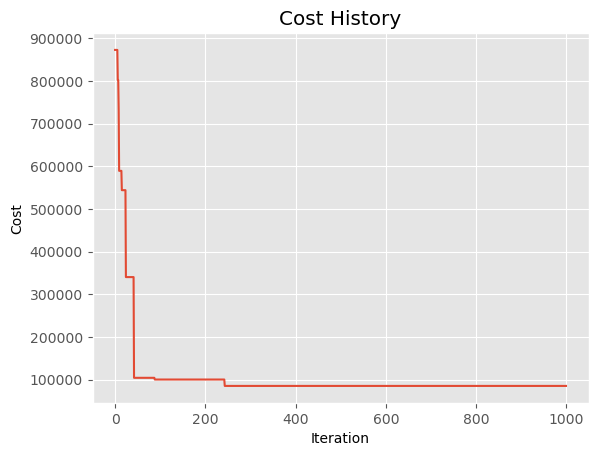

Optimal vehicle selection saved to 'optimal_vehicle_selection.csv'.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import pyswarms as ps

# Set random seed for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Load dataset
data = pd.read_csv("data/fleet_data_2023.csv")

# Extract relevant columns
cost_lookup = data['Cost ($)'].values  # Vehicle costs
demand = data['Demand (km)'].values * -1  # Convert demand to negative (ensures minimization)

# Ensure data integrity
assert len(cost_lookup) == len(demand), "Mismatch between cost and demand data."

# Total number of vehicles available
NUM_VEHICLES = len(cost_lookup)

# Swarm parameters
SWARM_SIZE = 30   # Number of particles in the swarm
NUM_ITER = 1000   # Number of iterations for optimization
PENALTY_FACTOR = 1e5  # Penalty for not meeting demand

# Fitness function for a single particle
def f_per_particle(m):
    selected_indices = np.where(m == 1)[0]

    # If no vehicle is selected, return a high cost
    if len(selected_indices) == 0:
        return float('inf')

    # Total demand covered by selected vehicles (since demand is negative, sum should be ≤ 0)
    total_demand_covered = demand[selected_indices].sum()

    # Total cost of selected vehicles
    total_cost = cost_lookup[selected_indices].sum()

    # Apply penalty if demand is NOT fully met (should be ≤ 0)
    demand_penalty = PENALTY_FACTOR * max(0, total_demand_covered)

    # Total objective function (cost + penalty for unmet demand)
    return total_cost + demand_penalty

# Fitness function for the swarm
def f(x):
    n_particles = x.shape[0]
    return np.array([f_per_particle(x[i]) for i in range(n_particles)])

# Run optimization model
def run_model(options):
    optimizer = ps.discrete.BinaryPSO(n_particles=SWARM_SIZE, dimensions=NUM_VEHICLES, options=options)
    cost, pos = optimizer.optimize(f, iters=NUM_ITER)

    # Print results
    selected_indices = np.where(pos == 1)[0]
    selected_demand = np.sum(demand[selected_indices])  # Should be ≤ 0
    selected_cost = np.sum(cost_lookup[selected_indices])

    print(f"No. of vehicles selected: {len(selected_indices)}")
    print(f"Total cost: {selected_cost}")
    print(f"Total demand covered: {selected_demand} (should be ≤ 0)")
    print(f"Selected vehicles (indices): {selected_indices}")

    return cost, pos, optimizer.cost_history, selected_indices

# Plot cost history
def plot_history(history):
    plt.style.use('ggplot')
    plt.plot(history)
    plt.title('Cost History')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.show()

# Run optimization
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': SWARM_SIZE, 'p': 2}
cost, pos, history, selected_indices = run_model(options)

# Plot cost history
plot_history(history)

# Save selected vehicles to CSV
selected_vehicles = data.iloc[selected_indices]
selected_vehicles.to_csv("optimal_vehicle_selection.csv", index=False)
print("Optimal vehicle selection saved to 'optimal_vehicle_selection.csv'.")


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pymoo.algorithms.moo.smpso import SMPSO
from pymoo.core.problem import ElementwiseProblem
from pymoo.optimize import minimize
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.mutation.pm import PM
from pymoo.operators.duplicate.elimination import DefaultDuplicateElimination

# Load the dataset
file_path = "filtered_file.csv"  # Update with the correct path if needed
df = pd.read_csv(file_path)

# Ensure numerical columns are correctly formatted
df["Total Cost"] = df["insurance_cost"] + df["maintenance_cost"] + df["fuel_costs"] + df["Cost"]

# Define the multi-objective optimization problem
class VehicleOptimizationProblem(ElementwiseProblem):
    def __init__(self, subset):
        super().__init__(n_var=1, n_obj=2, n_constr=0, xl=0, xu=len(subset)-1)
        self.subset = subset.reset_index(drop=True)

    def _evaluate(self, x, out, *args, **kwargs):
        x = int(x[0])  # Convert to index
        out["F"] = [self.subset.loc[x, "Total Cost"], self.subset.loc[x, "carbon_emissions"]]

# Store Pareto optimal solutions
pareto_solutions = []

# Unique (Size, Distance_x) combinations
combinations = df.groupby(["Size", "Distance_x"])

# Process each group separately
for (size, distance_x), group in combinations:
    group = group.copy().reset_index(drop=True)

    # Define problem instance
    problem = VehicleOptimizationProblem(group)

    # Define SMPSO algorithm
    algorithm = SMPSO(
        pop_size=20,
        sampling=FloatRandomSampling(),
        mutation=PM(eta=20),
        eliminate_duplicates=DefaultDuplicateElimination()
    )

    # Solve the problem
    res = minimize(problem, algorithm, termination=('n_gen', 50), verbose=False)

    # Extract Pareto front
    if res.X is not None and len(res.X) > 0:
        pareto_front = res.F  # Last generation's Pareto front
        pareto_allocations = [group.iloc[int(ind[0])]["Allocation"] for ind in res.X]

        for alloc, cost, carbon in zip(pareto_allocations, pareto_front[:, 0], pareto_front[:, 1]):
            fuel_type = group[group["carbon_emissions"] == carbon]["Fuel"].values[0]
            pareto_solutions.append((size, distance_x, alloc, cost, carbon, fuel_type))

    # Plot Pareto front with allocation labels
    plt.figure(figsize=(6, 4))
    plt.scatter(group["Total Cost"], group["carbon_emissions"], label="All Solutions", alpha=0.5)
    plt.scatter(pareto_front[:, 0], pareto_front[:, 1], color="red", label="Optimal Solutions")

    # Add labels for each point
    for i, alloc in enumerate(pareto_allocations):
        plt.annotate(alloc, (pareto_front[i, 0], pareto_front[i, 1]), fontsize=8, alpha=0.8)

    plt.xlabel("Total Cost ($)")
    plt.ylabel("Carbon Emissions")
    plt.title(f"SMPSO Optimization for {size} - {distance_x}")
    plt.legend()
    plt.grid()
    plt.show()

# Convert results to a DataFrame
pareto_df = pd.DataFrame(pareto_solutions, columns=["Size", "Distance_x", "Allocation", "Total Cost", "Carbon Emissions", "Fuel"])

# Save and print Pareto optimal solutions
# pareto_df.to_csv("smpso_pareto_optimal_solutions.csv", index=False)
print(pareto_df)


ModuleNotFoundError: No module named 'pymoo.algorithms.moo.smpso'

In [2]:
import pymoo
print(pymoo.__version__)  # Check version


0.6.1.3


In [3]:
from pymoo.factory import get_algorithm
print(get_algorithm())


ModuleNotFoundError: No module named 'pymoo.factory'

In [11]:
pip install pymoo==0.5.0


     ------------------------------------- 706.4/706.4 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 239.1/239.1 kB 14.3 MB/s eta 0:00:00
  Created wheel for pymoo: filename=pymoo-0.5.0-py3-none-any.whl size=842210 sha256=19922a5db08af47dbe557feffa7c7329379892ea70b7f6bb973155e7ebcb921d
  Stored in directory: c:\users\hjain\appdata\local\pip\cache\wheels\fb\13\64\7b6ccdd6d5fd46c8e1a770f7cf0dc1f43def1aafd09a0609cb
Successfully built pymoo
  Attempting uninstall: cma
    Found existing installation: cma 3.2.2
    Uninstalling cma-3.2.2:
      Successfully uninstalled cma-3.2.2
  Attempting uninstall: pymoo
    Found existing installation: pymoo 0.6.1.3
    Uninstalling pymoo-0.6.1.3:
      Successfully uninstalled pymoo-0.6.1.3
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\hjain\\anaconda3\\Lib\\site-packages\\~ymoo\\cython\\info.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pymoo.algorithms.moo.mopso import MOPSO
from pymoo.core.problem import ElementwiseProblem
from pymoo.optimize import minimize
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.mutation.pm import PM
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.selection.tournament import TournamentSelection
from pymoo.operators.duplicate.elimination import DefaultDuplicateElimination

# Load the dataset
file_path = "filtered_file.csv"  # Update with the correct path if needed
df = pd.read_csv(file_path)

# Ensure numerical columns are correctly formatted
df["Total Cost"] = df["insurance_cost"] + df["maintenance_cost"] + df["fuel_costs"] + df["Cost"]

# Define the multi-objective optimization problem
class VehicleOptimizationProblem(ElementwiseProblem):
    def __init__(self, subset):
        super().__init__(n_var=1, n_obj=2, n_constr=0, xl=0, xu=len(subset)-1)
        self.subset = subset.reset_index(drop=True)

    def _evaluate(self, x, out, *args, **kwargs):
        x = int(x[0])  # Convert to index
        out["F"] = [self.subset.loc[x, "Total Cost"], self.subset.loc[x, "carbon_emissions"]]

# Store Pareto optimal solutions
pareto_solutions = []

# Unique (Size, Distance_x) combinations
combinations = df.groupby(["Size", "Distance_x"])

# Process each group separately
for (size, distance_x), group in combinations:
    group = group.copy().reset_index(drop=True)

    # Define problem instance
    problem = VehicleOptimizationProblem(group)

    # Define MOPSO algorithm
    algorithm = MOPSO(
        pop_size=20,
        sampling=FloatRandomSampling(),
        mutation=PM(eta=20),
        eliminate_duplicates=DefaultDuplicateElimination()
    )

    # Solve the problem
    res = minimize(problem, algorithm, termination=('n_gen', 50), verbose=False)

    # Extract Pareto front
    if res.X is not None and len(res.X) > 0:
        pareto_front = res.F  # Last generation's Pareto front
        pareto_allocations = [group.iloc[int(ind[0])]["Allocation"] for ind in res.X]

        for alloc, cost, carbon in zip(pareto_allocations, pareto_front[:, 0], pareto_front[:, 1]):
            fuel_type = group[group["carbon_emissions"] == carbon]["Fuel"].values[0]
            pareto_solutions.append((size, distance_x, alloc, cost, carbon, fuel_type))

    # Plot Pareto front with allocation labels
    plt.figure(figsize=(6, 4))
    plt.scatter(group["Total Cost"], group["carbon_emissions"], label="All Solutions", alpha=0.5)
    plt.scatter(pareto_front[:, 0], pareto_front[:, 1], color="red", label="Optimal Solutions")

    # Add labels for each point
    for i, alloc in enumerate(pareto_allocations):
        plt.annotate(alloc, (pareto_front[i, 0], pareto_front[i, 1]), fontsize=8, alpha=0.8)

    plt.xlabel("Total Cost ($)")
    plt.ylabel("Carbon Emissions")
    plt.title(f"MOPSO Optimization for {size} - {distance_x}")
    plt.legend()
    plt.grid()
    plt.show()

# Convert results to a DataFrame
pareto_df = pd.DataFrame(pareto_solutions, columns=["Size", "Distance_x", "Allocation", "Total Cost", "Carbon Emissions", "Fuel"])

# Save and print Pareto optimal solutions
# pareto_df.to_csv("mopso_pareto_optimal_solutions.csv", index=False)
print(pareto_df)


ModuleNotFoundError: No module named 'pymoo.algorithms.moo.mopso'

In [2]:
import pymoo
print(pymoo.__version__)  # Should print 0.5.0


0.5.0


In [4]:
pip install -U pymoo


  Using cached pymoo-0.6.1.3-cp310-cp310-win_amd64.whl (909 kB)
  Using cached cma-3.2.2-py2.py3-none-any.whl (249 kB)
  Attempting uninstall: cma
    Found existing installation: cma 2.7.0
    Uninstalling cma-2.7.0:
      Successfully uninstalled cma-2.7.0
  Attempting uninstall: pymoo
    Found existing installation: pymoo 0.5.0
    Uninstalling pymoo-0.5.0:
      Successfully uninstalled pymoo-0.5.0
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Load the dataset
file_path = "filtered_file.csv"  # Update with the correct path if needed
df = pd.read_csv(file_path)

# Ensure numerical columns are correctly formatted
df["Total Cost"] = df["insurance_cost"] + df["maintenance_cost"] + df["fuel_costs"] + df["Cost"]

# MOPSO parameters
num_particles = 20
num_iterations = 50
w = 0.7  # Inertia weight
c1 = 1.5  # Cognitive coefficient
c2 = 1.5  # Social coefficient
archive_size = 10  # External archive size for Pareto front

# Store Pareto optimal solutions
pareto_solutions = []

# Unique (Size, Distance_x) combinations
combinations = df.groupby(["Size", "Distance_x"])

# Process each group separately
for (size, distance_x), group in combinations:
    group = group.copy().reset_index(drop=True)
    n = len(group)
    
    # Initialize particles
    positions = np.random.randint(0, n, size=num_particles)
    velocities = np.random.uniform(-1, 1, size=num_particles)
    personal_best_positions = positions.copy()
    personal_best_scores = np.array([[group.loc[i, "Total Cost"], group.loc[i, "carbon_emissions"]] for i in positions])
    
    # Initialize Pareto archive
    pareto_archive = []
    
    for _ in range(num_iterations):
        r1, r2 = np.random.rand(), np.random.rand()
        velocities = (w * velocities +
                      c1 * r1 * (personal_best_positions - positions) +
                      c2 * r2 * (np.random.choice(personal_best_positions) - positions))
        positions = np.clip(np.round(positions + velocities).astype(int), 0, n-1)
        
        # Evaluate new positions
        scores = np.array([[group.loc[i, "Total Cost"], group.loc[i, "carbon_emissions"]] for i in positions])
        
        # Update personal bests
        improved = (scores[:, 0] < personal_best_scores[:, 0]) & (scores[:, 1] < personal_best_scores[:, 1])
        personal_best_positions[improved] = positions[improved]
        personal_best_scores[improved] = scores[improved]
        
        # Update Pareto archive
        pareto_archive.extend(zip(positions, scores.tolist()))
        pareto_archive = list(set(pareto_archive))  # Remove duplicates
        pareto_archive = sorted(pareto_archive, key=lambda x: (x[1][0], x[1][1]))[:archive_size]  # Keep best solutions
    
    # Store Pareto optimal solutions
    for idx, (pos, score) in pareto_archive:
        alloc = group.iloc[pos]["Allocation"]
        cost = score[0]
        carbon = score[1]
        fuel_type = group.iloc[pos]["Fuel"]
        pareto_solutions.append((size, distance_x, alloc, cost, carbon, fuel_type))
    
    # Plot Pareto front
    plt.figure(figsize=(6, 4))
    plt.scatter(group["Total Cost"], group["carbon_emissions"], label="All Solutions", alpha=0.5)
    pareto_front = np.array([score for _, score in pareto_archive])
    plt.scatter(pareto_front[:, 0], pareto_front[:, 1], color="red", label="Pareto Front")
    
    for i, (pos, _) in enumerate(pareto_archive):
        plt.annotate(group.loc[pos, "Allocation"], (pareto_front[i, 0], pareto_front[i, 1]), fontsize=8, alpha=0.8)
    
    plt.xlabel("Total Cost ($)")
    plt.ylabel("Carbon Emissions")
    plt.title(f"Pareto Front for {size} - {distance_x}")
    plt.legend()
    plt.grid()
    plt.show()

# Convert results to a DataFrame
pareto_df = pd.DataFrame(pareto_solutions, columns=["Size", "Distance_x", "Allocation", "Total Cost", "Carbon Emissions", "Fuel"])

# Save and print Pareto optimal solutions
print(pareto_df)

TypeError: unhashable type: 'list'

ValueError: setting an array element with a sequence.

In [8]:
pip install pyswarm

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4485 sha256=ce0fcb26deb51f3c208175822e237a5836d8d9866bf823a62abcb15d45cb90fc
  Stored in directory: c:\users\hjain\appdata\local\pip\cache\wheels\3a\dc\85\708c16bc4b8ee614c5e8aa10f24a4574dee291822622df7df7
Successfully built pyswarm
Note: you may need to restart the kernel to use updated packages.


c:\Users\hjain\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\hjain\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Particle' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


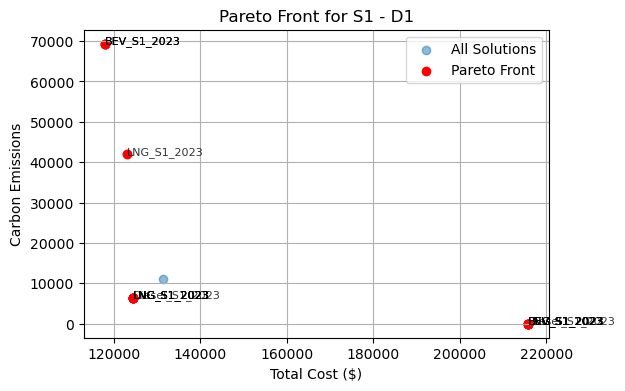

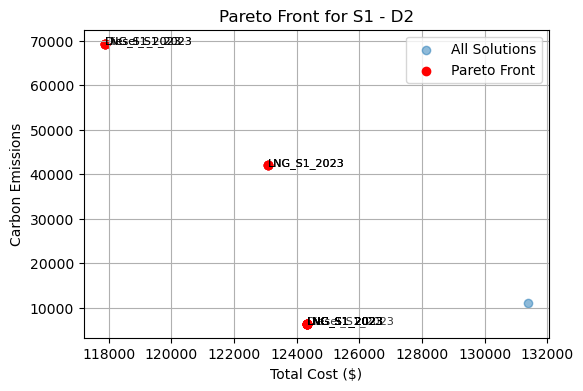

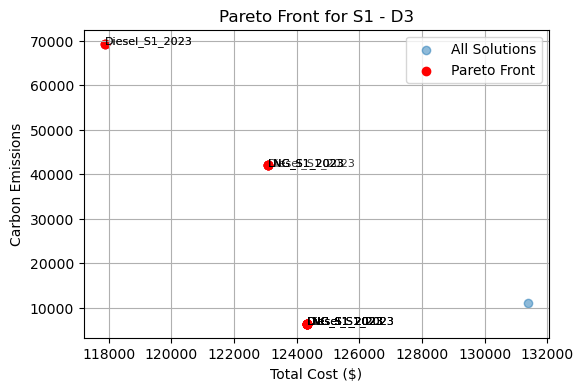

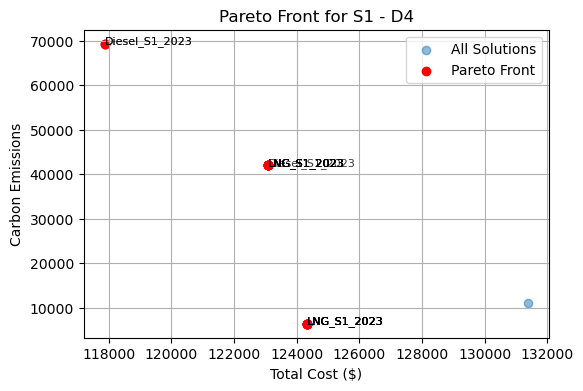

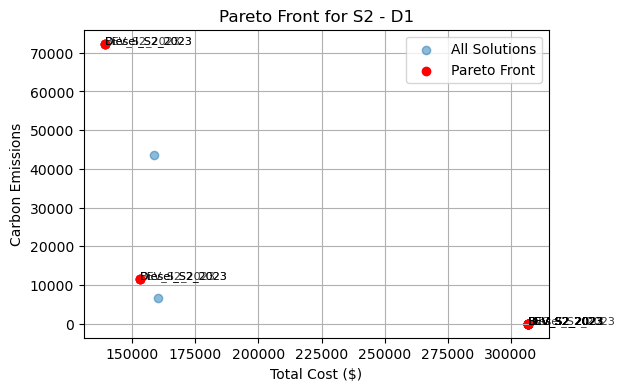

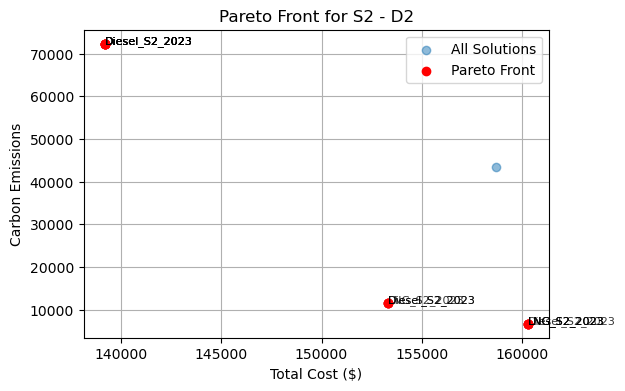

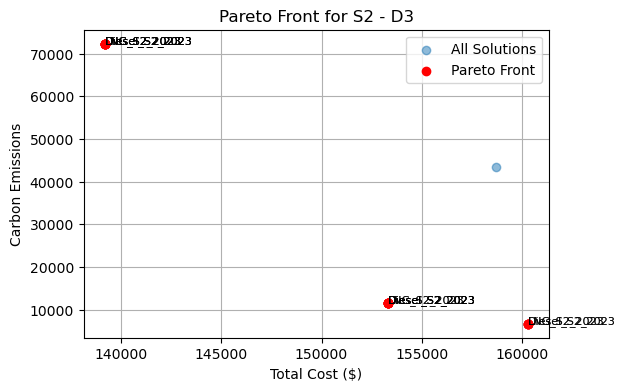

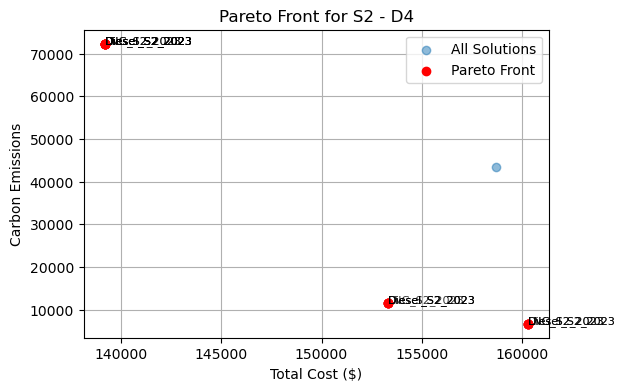

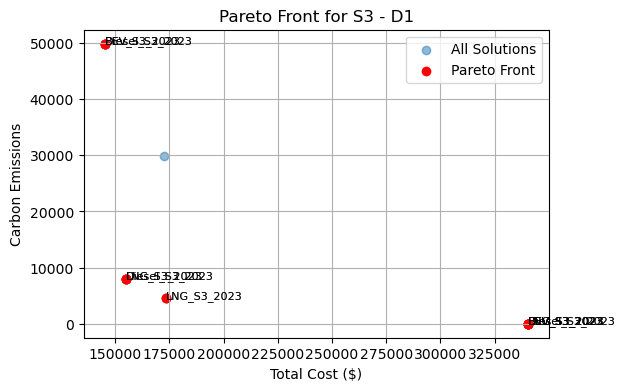

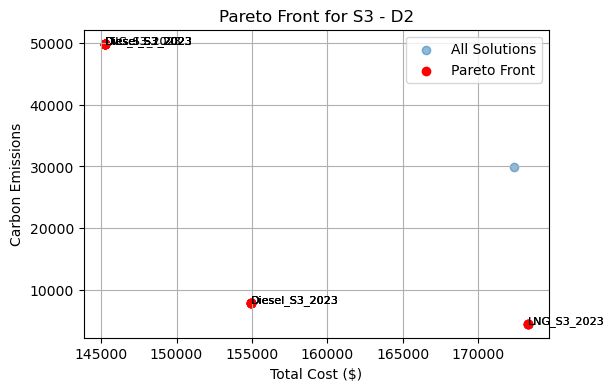

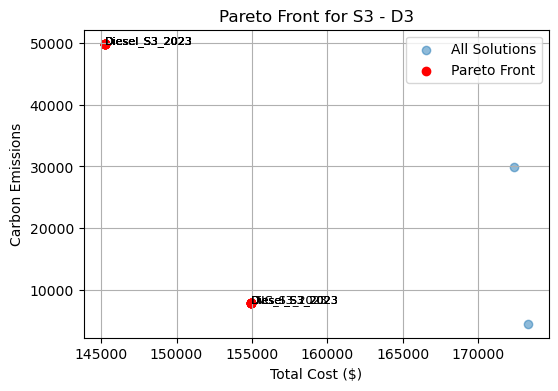

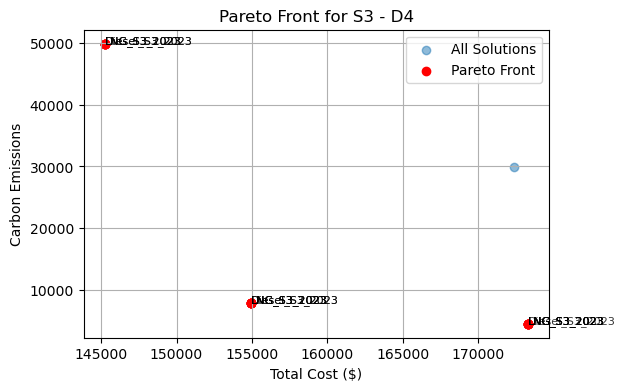

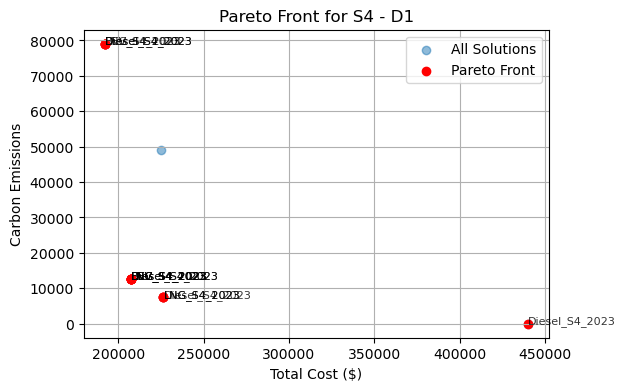

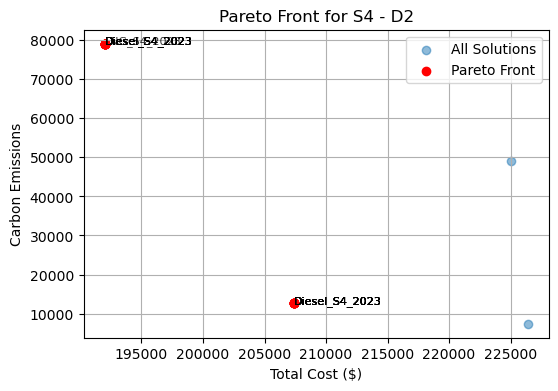

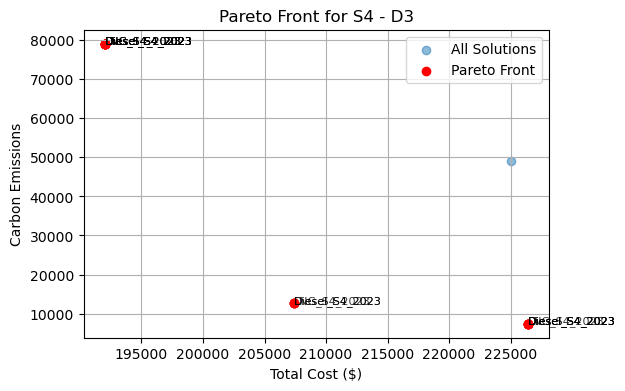

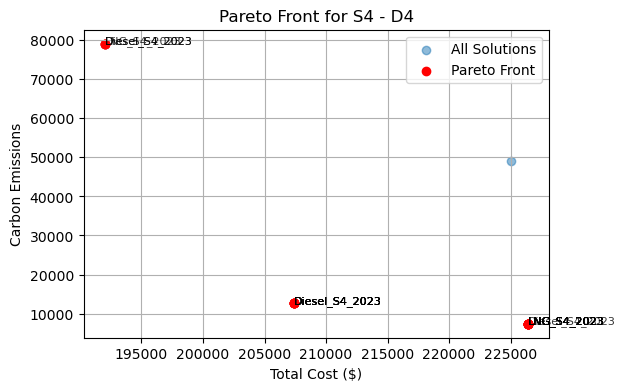

    Size Distance_x      Allocation     Total Cost  Carbon Emissions  \
0     S1         D1  Diesel_S1_2023  215690.316221          0.000000   
1     S1         D1     LNG_S1_2023  215690.316221          0.000000   
2     S1         D1     BEV_S1_2023  215690.316221          0.000000   
3     S1         D1     LNG_S1_2023  215690.316221          0.000000   
4     S1         D1     BEV_S1_2023  215690.316221          0.000000   
..   ...        ...             ...            ...               ...   
267   S4         D4  Diesel_S4_2023  207410.770276      12648.764684   
268   S4         D4  Diesel_S4_2023  207410.770276      12648.764684   
269   S4         D4  Diesel_S4_2023  207410.770276      12648.764684   
270   S4         D4  Diesel_S4_2023  207410.770276      12648.764684   
271   S4         D4  Diesel_S4_2023  207410.770276      12648.764684   

            Fuel  
0    Electricity  
1    Electricity  
2    Electricity  
3    Electricity  
4    Electricity  
..           ...  
26

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import random

# Load the dataset
file_path = "filtered_file.csv"  # Update with the correct path if needed
df = pd.read_csv(file_path)

# Ensure numerical columns are correctly formatted
df["Total Cost"] = df["insurance_cost"] + df["maintenance_cost"] + df["fuel_costs"] + df["Cost"]

# Store Pareto optimal solutions
pareto_solutions = []

# Unique (Size, Distance_x) combinations
combinations = df.groupby(["Size", "Distance_x"])

# DEAP setup for MOPSO
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0))  # Minimize both objectives
creator.create("Particle", list, fitness=creator.FitnessMulti, speed=list, best=None)

def generate_particle(size):
    particle = creator.Particle([random.randint(0, size - 1)])
    particle.speed = [random.uniform(-1, 1)]
    return particle

def update_particle(particle, best, phi1, phi2, w):
    u1 = random.uniform(0, phi1)
    u2 = random.uniform(0, phi2)
    v_pbest = [p - x for p, x in zip(particle.best, particle)]
    v_gbest = [g - x for g, x in zip(best, particle)]
    particle.speed = [w * v + u1 * p + u2 * g for v, p, g in zip(particle.speed, v_pbest, v_gbest)]
    particle[:] = [int(round(x + v)) for x, v in zip(particle, particle.speed)]
    # particle[0] = max(0, min(particle[0], size - 1))  # Ensure valid index
    particle[0] = max(0, min(particle[0], len(group) - 1))  # Use len(group) instead of size


def evaluate_particle(particle, group):
    idx = int(particle[0])
    return group.loc[idx, "Total Cost"], group.loc[idx, "carbon_emissions"]

# Process each group separately
for (size, distance_x), group in combinations:
    group = group.copy().reset_index(drop=True)
    n = len(group)
    
    toolbox = base.Toolbox()
    toolbox.register("particle", generate_particle, size=n)
    toolbox.register("population", tools.initRepeat, list, toolbox.particle)
    toolbox.register("update", update_particle, phi1=1.5, phi2=1.5, w=0.7)
    toolbox.register("evaluate", evaluate_particle, group=group)
    
    pop = toolbox.population(n=20)
    best = None
    
    for _ in range(50):
        for part in pop:
            part.fitness.values = toolbox.evaluate(part)
            if not part.best or part.fitness.dominates(part.best.fitness):
                part.best = creator.Particle(part[:])
                part.best.fitness.values = part.fitness.values
        
        best = tools.sortNondominated(pop, len(pop), first_front_only=True)[0]
        for part in pop:
            toolbox.update(part, random.choice(best))
    
    pareto_front = np.array([p.fitness.values for p in best])
    pareto_allocations = [group.iloc[int(p[0])]["Allocation"] for p in best]
    
    for alloc, (cost, carbon) in zip(pareto_allocations, pareto_front):
        fuel_type = group[group["carbon_emissions"] == carbon]["Fuel"].values[0]
        pareto_solutions.append((size, distance_x, alloc, cost, carbon, fuel_type))
    
    # Plot Pareto front
    plt.figure(figsize=(6, 4))
    plt.scatter(group["Total Cost"], group["carbon_emissions"], label="All Solutions", alpha=0.5)
    plt.scatter(pareto_front[:, 0], pareto_front[:, 1], color="red", label="Pareto Front")
    
    for i, alloc in enumerate(pareto_allocations):
        plt.annotate(alloc, (pareto_front[i, 0], pareto_front[i, 1]), fontsize=8, alpha=0.8)
    
    plt.xlabel("Total Cost ($)")
    plt.ylabel("Carbon Emissions")
    plt.title(f"Pareto Front for {size} - {distance_x}")
    plt.legend()
    plt.grid()
    plt.show()

# Convert results to a DataFrame
pareto_df = pd.DataFrame(pareto_solutions, columns=["Size", "Distance_x", "Allocation", "Total Cost", "Carbon Emissions", "Fuel"])

# Save and print Pareto optimal solutions
print(pareto_df)

In [4]:
# Convert to DataFrame
pareto_df = pd.DataFrame(pareto_solutions, columns=["Size", "Distance_x", "Allocation", "Total Cost", "Carbon Emissions","Fuel"])

# Compute the number of vehicles required
pareto_df["Num Vehicles"] = pareto_df.apply(
    lambda row: df[(df["Size"] == row["Size"]) & (df["Distance_x"] == row["Distance_x"])].iloc[0]["Demand (km)"] / 
                df[(df["Size"] == row["Size"]) & (df["Distance_x"] == row["Distance_x"])].iloc[0]["Yearly range (km)"], 
    axis=1
)

# Save only final selections to CSV
# pareto_df.to_csv("pareto_optimal_solutions_final.csv", index=False)

# Print final selections
pareto_df


,Size,Distance_x,Allocation,Total Cost,Carbon Emissions,Fuel,Num Vehicles
0,S1,D1,Diesel_S1_2023,215690.316221,0.000000,Electricity,8.521382
1,S1,D1,LNG_S1_2023,215690.316221,0.000000,Electricity,8.521382
2,S1,D1,BEV_S1_2023,215690.316221,0.000000,Electricity,8.521382
3,S1,D1,LNG_S1_2023,215690.316221,0.000000,Electricity,8.521382
4,S1,D1,BEV_S1_2023,215690.316221,0.000000,Electricity,8.521382
...,...,...,...,...,...,...,...
267,S4,D4,Diesel_S4_2023,207410.770276,12648.764684,HVO,0.015331
268,S4,D4,Diesel_S4_2023,207410.770276,12648.764684,HVO,0.015331
269,S4,D4,Diesel_S4_2023,207410.770276,12648.764684,HVO,0.015331
270,S4,D4,Diesel_S4_2023,207410.770276,12648.764684,HVO,0.015331


In [5]:
pareto_df = pareto_df.drop_duplicates()

# Save and print Pareto optimal solutions
pareto_df.to_csv("pareto_optimal_solutions_pso.csv", index=False)
print(pareto_df)

    Size Distance_x      Allocation     Total Cost  Carbon Emissions  \
0     S1         D1  Diesel_S1_2023  215690.316221          0.000000   
1     S1         D1     LNG_S1_2023  215690.316221          0.000000   
2     S1         D1     BEV_S1_2023  215690.316221          0.000000   
7     S1         D1     BEV_S1_2023  117871.219051      69347.975963   
10    S1         D1     LNG_S1_2023  124325.652865       6375.265894   
..   ...        ...             ...            ...               ...   
254   S4         D4     LNG_S4_2023  226380.754083       7416.792843   
259   S4         D4  Diesel_S4_2023  226380.754083       7416.792843   
263   S4         D4     LNG_S4_2023  192016.404172      79078.903088   
264   S4         D4  Diesel_S4_2023  192016.404172      79078.903088   
266   S4         D4  Diesel_S4_2023  207410.770276      12648.764684   

            Fuel  Num Vehicles  
0    Electricity      8.521382  
1    Electricity      8.521382  
2    Electricity      8.521382  
7  

In [6]:
pareto_df = pareto_df.drop_duplicates()


In [7]:
pareto_df

,Size,Distance_x,Allocation,Total Cost,Carbon Emissions,Fuel,Num Vehicles
0,S1,D1,Diesel_S1_2023,215690.316221,0.000000,Electricity,8.521382
1,S1,D1,LNG_S1_2023,215690.316221,0.000000,Electricity,8.521382
2,S1,D1,BEV_S1_2023,215690.316221,0.000000,Electricity,8.521382
7,S1,D1,BEV_S1_2023,117871.219051,69347.975963,B20,8.521382
10,S1,D1,LNG_S1_2023,124325.652865,6375.265894,BioLNG,8.521382
...,...,...,...,...,...,...,...
254,S4,D4,LNG_S4_2023,226380.754083,7416.792843,BioLNG,0.015331
259,S4,D4,Diesel_S4_2023,226380.754083,7416.792843,BioLNG,0.015331
263,S4,D4,LNG_S4_2023,192016.404172,79078.903088,B20,0.015331
264,S4,D4,Diesel_S4_2023,192016.404172,79078.903088,B20,0.015331


        Allocation     Total Cost  Carbon Emissions         Fuel
0   Diesel_S1_2023  117871.219051      69347.975963          B20
1   Diesel_S1_2023  117871.219051      69347.975963          B20
2      BEV_S1_2023  117871.219051      69347.975963          B20
3      LNG_S1_2023  117871.219051      69347.975963          B20
4      LNG_S1_2023  117871.219051      69347.975963          B20
5      BEV_S1_2023  215690.316221          0.000000  Electricity
6      LNG_S1_2023  215690.316221          0.000000  Electricity
7      LNG_S1_2023  123077.879517      41971.148530          LNG
8      BEV_S1_2023  123077.879517      41971.148530          LNG
9      LNG_S1_2023  124325.652865       6375.265894       BioLNG
10  Diesel_S2_2023  124325.652865       6375.265894       BioLNG
11     LNG_S1_2023  124325.652865       6375.265894       BioLNG


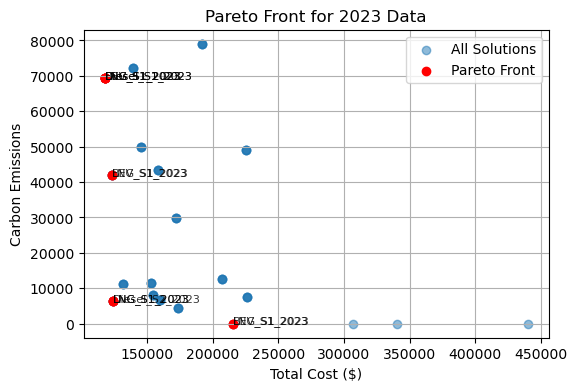

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import random

# Load the dataset
file_path = "filtered_file.csv"  # Update with the correct path
df = pd.read_csv(file_path)

# Filter dataset for the year 2023
df = df[df["Operating Year"] == 2023].copy().reset_index(drop=True)

# Ensure numerical columns are correctly formatted
df["Total Cost"] = df["insurance_cost"] + df["maintenance_cost"] + df["fuel_costs"] + df["Cost"]

# DEAP setup for MOPSO
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0))  # Minimize both objectives
creator.create("Particle", list, fitness=creator.FitnessMulti, speed=list, best=None)

def generate_particle(size):
    particle = creator.Particle([random.randint(0, size - 1)])
    particle.speed = [random.uniform(-1, 1)]
    return particle

def update_particle(particle, best, phi1, phi2, w):
    u1 = random.uniform(0, phi1)
    u2 = random.uniform(0, phi2)
    v_pbest = [p - x for p, x in zip(particle.best, particle)]
    v_gbest = [g - x for g, x in zip(best, particle)]
    particle.speed = [w * v + u1 * p + u2 * g for v, p, g in zip(particle.speed, v_pbest, v_gbest)]
    particle[:] = [int(round(x + v)) for x, v in zip(particle, particle.speed)]
    particle[0] = max(0, min(particle[0], len(df) - 1))  # Ensure valid index

def evaluate_particle(particle):
    idx = int(particle[0])
    return df.loc[idx, "Total Cost"], df.loc[idx, "carbon_emissions"]

# DEAP Toolbox Setup
n = len(df)
toolbox = base.Toolbox()
toolbox.register("particle", generate_particle, size=n)
toolbox.register("population", tools.initRepeat, list, toolbox.particle)
toolbox.register("update", update_particle, phi1=1.5, phi2=1.5, w=0.7)
toolbox.register("evaluate", evaluate_particle)

# Initialize the Population
pop = toolbox.population(n=20)
best = None

# Optimization Loop
for _ in range(50):
    for part in pop:
        part.fitness.values = toolbox.evaluate(part)
        if not part.best or part.fitness.dominates(part.best.fitness):
            part.best = creator.Particle(part[:])
            part.best.fitness.values = part.fitness.values
    
    best = tools.sortNondominated(pop, len(pop), first_front_only=True)[0]
    for part in pop:
        toolbox.update(part, random.choice(best))

# Extract Pareto Front Solutions
pareto_front = np.array([p.fitness.values for p in best])
pareto_allocations = [df.iloc[int(p[0])]["Allocation"] for p in best]

pareto_solutions = []
for alloc, (cost, carbon) in zip(pareto_allocations, pareto_front):
    fuel_type = df[df["carbon_emissions"] == carbon]["Fuel"].values[0]
    pareto_solutions.append((alloc, cost, carbon, fuel_type))

# Convert results to a DataFrame
pareto_df = pd.DataFrame(pareto_solutions, columns=["Allocation", "Total Cost", "Carbon Emissions", "Fuel"])

# Save and print Pareto optimal solutions
print(pareto_df)

# Plot Pareto front
plt.figure(figsize=(6, 4))
plt.scatter(df["Total Cost"], df["carbon_emissions"], label="All Solutions", alpha=0.5)
plt.scatter(pareto_front[:, 0], pareto_front[:, 1], color="red", label="Pareto Front")

for i, alloc in enumerate(pareto_allocations):
    plt.annotate(alloc, (pareto_front[i, 0], pareto_front[i, 1]), fontsize=8, alpha=0.8)

plt.xlabel("Total Cost ($)")
plt.ylabel("Carbon Emissions")
plt.title("Pareto Front for 2023 Data")
plt.legend()
plt.grid()
plt.show()


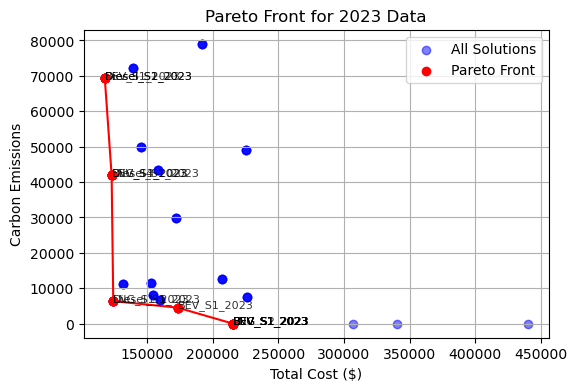

In [4]:
# Sort Pareto front points for proper curve plotting
pareto_sorted = pareto_front[pareto_front[:, 0].argsort()]

# Plot Pareto front with connecting lines
plt.figure(figsize=(6, 4))
plt.scatter(df["Total Cost"], df["carbon_emissions"], label="All Solutions", alpha=0.5, color="blue")
plt.scatter(pareto_sorted[:, 0], pareto_sorted[:, 1], color="red", label="Pareto Front")
plt.plot(pareto_sorted[:, 0], pareto_sorted[:, 1], color="red", linestyle='-', marker='o')  # Connecting lines

# Add annotations
for i, alloc in enumerate(pareto_allocations):
    plt.annotate(alloc, (pareto_sorted[i, 0], pareto_sorted[i, 1]), fontsize=8, alpha=0.8)

plt.xlabel("Total Cost ($)")
plt.ylabel("Carbon Emissions")
plt.title("Pareto Front for 2023 Data")
plt.legend()
plt.grid()
plt.show()



Unique Pareto Front Solutions:
Allocation	Total Cost ($)	Carbon Emissions	Fuel Type
BEV_S4_2023	117871.22	69347.98	B20
BEV_S1_2023	123077.88	41971.15	LNG
LNG_S3_2023	124325.65	6375.27	BioLNG
LNG_S2_2023	173281.86	4549.57	BioLNG
BEV_S1_2023	215690.32	0.00	Electricity


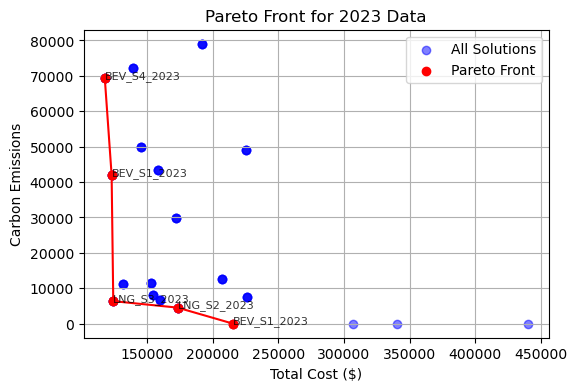

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Remove duplicate Pareto points while keeping allocations
unique_pareto = {}
for i, (cost, carbon) in enumerate(pareto_front):
    key = (cost, carbon)  # Ensure it's a tuple (hashable)
    if key not in unique_pareto:
        unique_pareto[key] = pareto_allocations[i]

# Convert back to sorted lists for plotting
pareto_sorted = sorted(unique_pareto.keys())  # List of tuples
pareto_allocations_sorted = [unique_pareto[key] for key in pareto_sorted]

# Convert list of tuples to NumPy array for plotting
pareto_sorted_array = np.array(pareto_sorted)

# Print unique Pareto-optimal points
print("\nUnique Pareto Front Solutions:")
print("Allocation\tTotal Cost ($)\tCarbon Emissions\tFuel Type")
for i, (cost, carbon) in enumerate(pareto_sorted):
    fuel_type = df[df["carbon_emissions"] == carbon]["Fuel"].values[0]
    print(f"{pareto_allocations_sorted[i]}\t{cost:.2f}\t{carbon:.2f}\t{fuel_type}")

# Plot Pareto front with connecting lines
plt.figure(figsize=(6, 4))
plt.scatter(df["Total Cost"], df["carbon_emissions"], label="All Solutions", alpha=0.5, color="blue")
plt.scatter(pareto_sorted_array[:, 0], pareto_sorted_array[:, 1], color="red", label="Pareto Front")
plt.plot(pareto_sorted_array[:, 0], pareto_sorted_array[:, 1], color="red", linestyle='-', marker='o')

# Add annotations
for i, alloc in enumerate(pareto_allocations_sorted):
    plt.annotate(alloc, (pareto_sorted_array[i, 0], pareto_sorted_array[i, 1]), fontsize=8, alpha=0.8)

plt.xlabel("Total Cost ($)")
plt.ylabel("Carbon Emissions")
plt.title("Pareto Front for 2023 Data")
plt.legend()
plt.grid()
plt.show()


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_crowding_distance(pareto_points):
    """
    Compute the crowding distance for each point in the Pareto front.
    
    Parameters:
    pareto_points (ndarray): A NumPy array of shape (N, 2) where N is the number of Pareto-optimal points.
    
    Returns:
    ndarray: A NumPy array of crowding distances for each Pareto point.
    """
    num_points = len(pareto_points)
    distances = np.zeros(num_points)  # Initialize crowding distances

    for i in range(2):  # Iterate over objectives (cost and carbon)
        sorted_indices = np.argsort(pareto_points[:, i])  # Sort by current objective
        sorted_points = pareto_points[sorted_indices]
        
        # Assign a large distance to boundary points (max diversity)
        distances[sorted_indices[0]] = np.inf
        distances[sorted_indices[-1]] = np.inf
        
        # Compute normalized crowding distance for interior points
        min_value = sorted_points[0, i]
        max_value = sorted_points[-1, i]
        range_value = max_value - min_value if max_value - min_value > 0 else 1  # Avoid division by zero

        for j in range(1, num_points - 1):
            distances[sorted_indices[j]] += (sorted_points[j + 1, i] - sorted_points[j - 1, i]) / range_value

    return distances

# Remove duplicate Pareto points while keeping allocations
unique_pareto = {}
for i, (cost, carbon) in enumerate(pareto_front):
    key = (cost, carbon)
    if key not in unique_pareto:
        unique_pareto[key] = pareto_allocations[i]

# Convert to sorted lists
pareto_sorted = sorted(unique_pareto.keys())  # List of tuples
pareto_allocations_sorted = [unique_pareto[key] for key in pareto_sorted]
pareto_sorted_array = np.array(pareto_sorted)  # Convert list to NumPy array

# Compute crowding distance
crowding_distances = calculate_crowding_distance(pareto_sorted_array)

# Print Pareto front solutions with crowding distances
print("\nPareto Front Solutions with Crowding Distances:")
print("Allocation\tTotal Cost ($)\tCarbon Emissions\tCrowding Distance")
for i, (cost, carbon) in enumerate(pareto_sorted):
    print(f"{pareto_allocations_sorted[i]}\t{cost:.2f}\t{carbon:.2f}\t{crowding_distances[i]:.4f}")

# # Plot Pareto front with crowding distances
# plt.figure(figsize=(6, 4))
# plt.scatter(df["Total Cost"], df["carbon_emissions"], label="All Solutions", alpha=0.5, color="blue")
# plt.scatter(pareto_sorted_array[:, 0], pareto_sorted_array[:, 1], c=crowding_distances, cmap="coolwarm", edgecolors="black", label="Pareto Front")
# plt.colorbar(label="Crowding Distance")

# # Add annotations
# for i, alloc in enumerate(pareto_allocations_sorted):
#     plt.annotate(alloc, (pareto_sorted_array[i, 0], pareto_sorted_array[i, 1]), fontsize=8, alpha=0.8)

# plt.xlabel("Total Cost ($)")
# plt.ylabel("Carbon Emissions")
# plt.title("Pareto Front with Crowding Distance")
# plt.legend()
# plt.grid()
# plt.show()



Pareto Front Solutions with Crowding Distances:
Allocation	Total Cost ($)	Carbon Emissions	Crowding Distance
BEV_S4_2023	117871.22	69347.98	inf
BEV_S1_2023	123077.88	41971.15	0.9741
LNG_S3_2023	124325.65	6375.27	1.0529
LNG_S2_2023	173281.86	4549.57	1.0259
BEV_S1_2023	215690.32	0.00	inf
